# SCIENTIFIC COMPUTING – SECOND LAB

Natalia Lara Davila

hipotesis nula y p-valorIn this work, we continue to implement a scientific analysis of the data obtained from the interferometric structure SMS (monomode-multimode-monomode) based on an optical fiber designed using simulation software such as FIMMWAVE, to this structure has been made geometric variations to the multimode section and the changes in the refractive index (RI) section of the surrounding environment. Various scientific programming tools include Object-Oriented Programming (OOP), numerical differentiation and integration, vectorization, and handling of matrices, vectors, and tensors.

## Context

The SMS interferometric structure has been analyzed with two different geometric configurations for the MMF section. For 125$\mu m$ (Figure 1.a) and 25$\mu m$ (Figure 1.b) diameters.  Both were subjected to the RI variations of the environment were varied between 1.33 and 1.41 that corresponding to liquid substances such as water, ethanol, propanol, and methanol, commonly used in experimental tests.

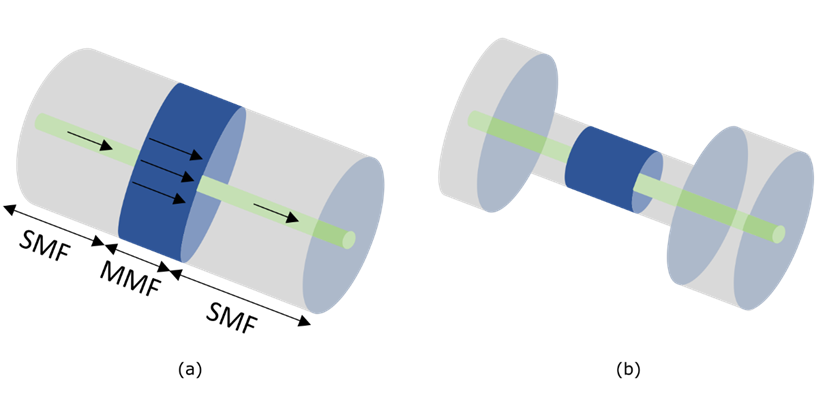

Figure 1: SMS squematic. (a) MMF at 125$\mu m$, (b) MMF at 25$\mu m$.


Using tools such as OOP, numerical differentiation and integration, and vectorisation and matrix handling, a large spectral landslide and high sensitivity between 1.33 and 1.37 RI were identified. However, these then decreased abruptly (Figure 2a). Initially, it was assumed that errors in the simulation parameters were responsible, but a more detailed analysis revealed that the spectral peaks selected for the different RIs were not the same. This is because the transmission spectrum presents multiple peaks due to multimode interference (MMI). As the RI in the environment increases, the peaks shift to longer wavelengths, causing the peaks corresponding to the different RIs to superimpose (Figure 2.b). This was confusing because, rather than following the first peak of each curve, the first peak corresponding to the other RI was analysed, which undermined the sensitivity analysis of the sensor. This confusion is addressed in this second study by extracting spectral characteristics such as wavelength, transmission, spectral width, and the prominence of specific peaks.

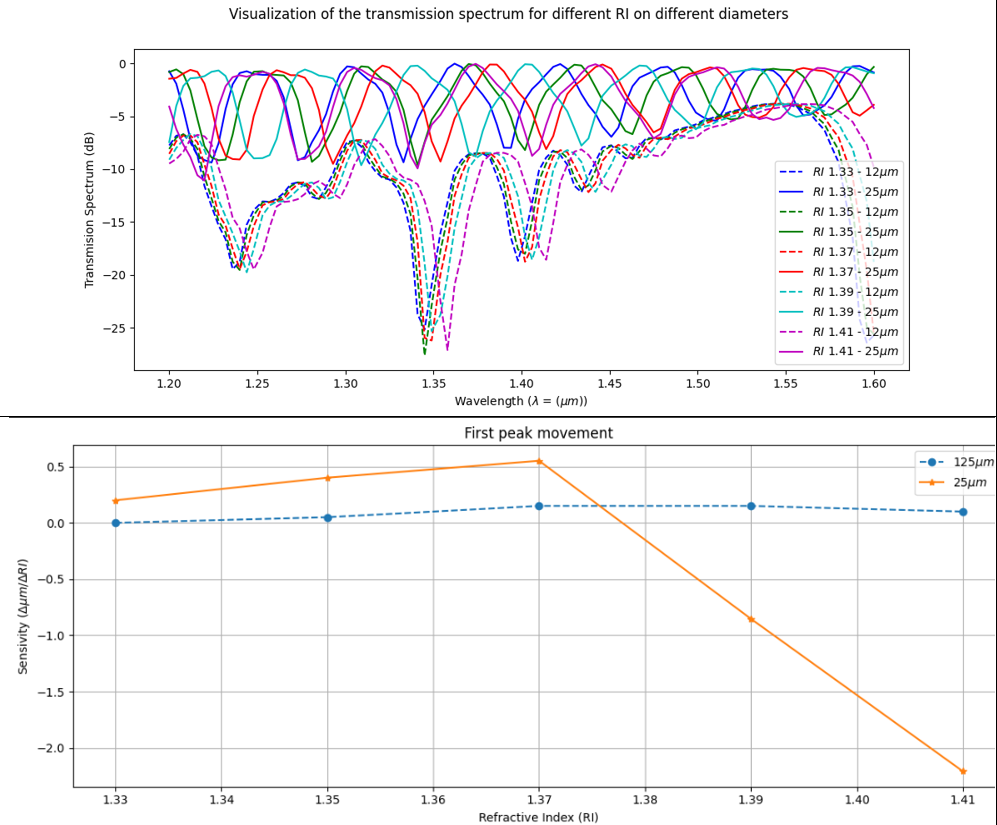

Figure 2: (a) Visualization of the transmission spectrum for different RI on different diameters, (b) Sensitivity to first peak movement.

In this second part, we will evaluate the performance of the structure, such as a possible biosensor, based on the extracted characteristics. To do this, we will apply a statistical analysis using a normalised test, such as the Shapiro–Wilk test, and a non-parametric test, such as the Wilcoxon test. We will also evaluate the separability between the classes to determine the sensor's discriminative capacity in different geometric conditions or surrounding environments



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.signal import find_peaks, peak_prominences, peak_widths
import seaborn as sns
from scipy.stats import f_oneway, shapiro, wilcoxon, pearsonr
from sklearn.metrics import mean_squared_error
from pathlib import Path

## Advanced data handling with Pandas.

The Scipy find_peaks function was used to process the data and visualise the transmission spectrum as a function of the different geometries and RI of the fibre's surrounding medium, together with the resonance peaks and their respective coordinates. To this end, Pandas tools were employed to efficiently filter and organise the information. Initially, the analysis was restricted to a wavelength range of 1.04 and 1.43 to avoid visualising incomplete or deformed peaks, which could occur outside this range. Additionally, a -10 dB threshold was set for the peaks, as peaks above this value are usually associated with an insignificant system response. Although this is a simulation and missing data is unlikely to appear, the large volume of data means that the existence of null values is verified using the pandas .isnull() function. In addition, the type of data available per column is checked.

In [2]:
# Import data
#Data = pd.read_csv('Data_1104.csv')

Data_root = Path().resolve()
data_path = Data_root.parents[1] / "Data" / "raw" / "Data_1104.csv"

Data = pd.read_csv(data_path)

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\l'
<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\l'
C:\Users\ITM\AppData\Local\Temp\ipykernel_150820\1055471220.py:9: SyntaxWarning: invalid escape sequence '\m'
  fig.suptitle('Visualization of the transmission spectrum for MMF = 125$\mu m$')
C:\Users\ITM\AppData\Local\Temp\ipykernel_150820\1055471220.py:11: SyntaxWarning: invalid escape sequence '\m'
  fig2.suptitle('Visualization of the transmission spectrum for MMF = 25$\mu m$')
C:\Us

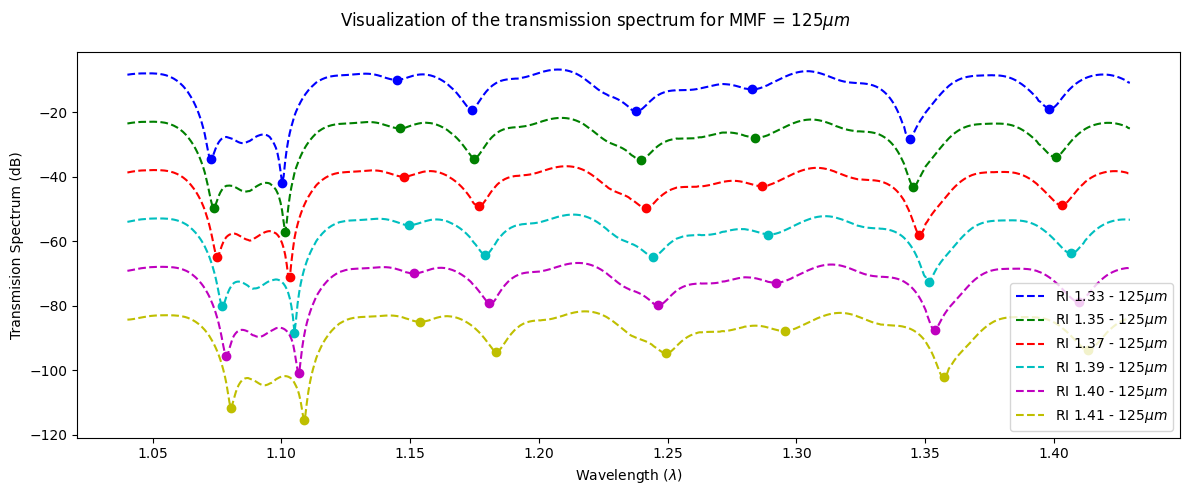

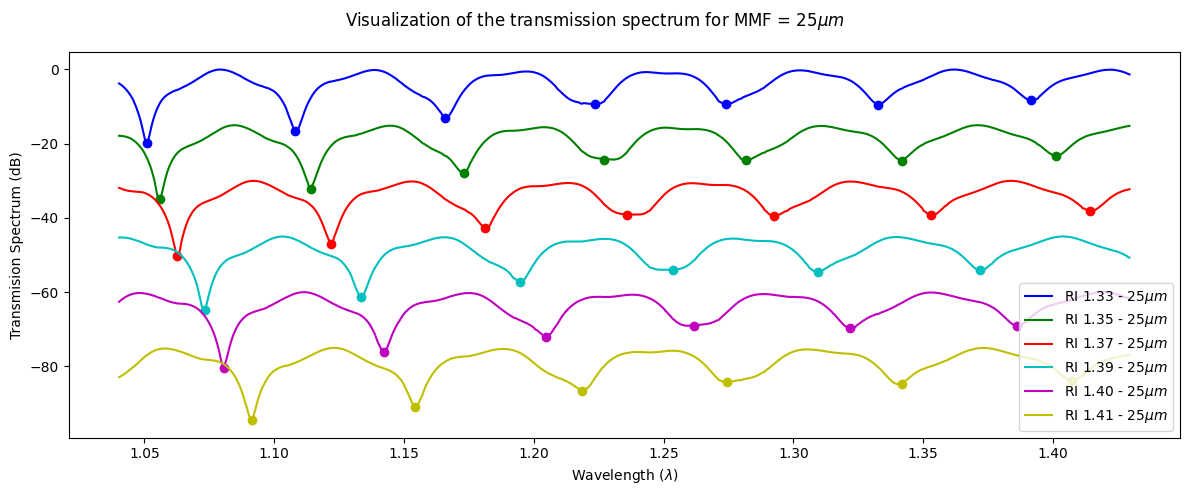

In [3]:
# list of values RI for every column
RI = ['1.33', '1.35', '1.37', '1.39', '1.40', '1.41']
unetching = ['RI_Water', 'RI_B', 'RI_C', 'RI_D', 'RI_E', 'RI_F']
etching = ['RI_Water_etching', 'RI_B_etching', 'RI_C_etching', 'RI_D_etching', 'RI_E_etching', 'RI_F_etching']


# Visualisation of all RI on different diameters
fig,ax = plt.subplots(figsize=(12,5))
fig.suptitle('Visualization of the transmission spectrum for MMF = 125$\mu m$')
fig2,ax2 = plt.subplots(figsize=(12,5))
fig2.suptitle('Visualization of the transmission spectrum for MMF = 25$\mu m$')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'gray', 'maroon']

Peak_results = []

Data = Data[(Data['Wavelength'] >= 1.04) & (Data['Wavelength'] <= 1.43)].reset_index(drop=True)


for i in range(len(RI)):

    # Y-axis offset to better visualise peaks
    offset_step = i*-15
    spectrum_125um_offset = Data[unetching[i]] + offset_step
    ax.plot(Data.Wavelength, spectrum_125um_offset, linestyle="--", color=colors[i], label=f'RI {RI[i]} - 125$\mu m$')
    peaks125, _ = find_peaks(-spectrum_125um_offset, threshold = 0.0001, distance= 45)
    #prominences125 = peak_prominences(-Data[unetching[i]], peaks125)[0]
    ax.plot(Data.Wavelength[peaks125], spectrum_125um_offset[peaks125], "o", color=colors[i])
    ax.legend()
    ax.set_xlabel('Wavelength ($\lambda$)')
    ax.set_ylabel('Transmision Spectrum (dB)')

    # Storage of peak data 125um
    df_125 = pd.DataFrame({
        'Dimensión MMF': '125 µm',
        'surrounding environment': RI[i],
        'Peak number': np.arange(1, len(peaks125)+1),
        'Wavelength': Data.Wavelength[peaks125],
        'Transmision (offset)': spectrum_125um_offset[peaks125],
        'Distance between peaks': np.array(Data.Wavelength[peaks125]) - Data.Wavelength[peaks125].iloc[0] if len(peaks125) > 0 else 0
    })

    Peak_results.append(df_125)


    # 25 um
    spectrum_25um_offset = Data[etching[i]] + offset_step
    ax2.plot(Data.Wavelength, spectrum_25um_offset, linestyle="-", color=colors[i], label=f'RI {RI[i]} - 25$\mu m$')
    peaks25, _ = find_peaks(-spectrum_25um_offset, threshold = 0.0001, distance= 50)
    #prominences125 = peak_prominences(-Data[etching[i]], peaks125)[0]
    ax2.plot(Data.Wavelength[peaks25], spectrum_25um_offset[peaks25], "o", color=colors[i])
    ax2.legend()
    ax2.set_xlabel('Wavelength ($\lambda$)')
    ax2.set_ylabel('Transmision Spectrum (dB)')

    # Storage of peak data 25um
    df_25 = pd.DataFrame({
        'Dimensión MMF': '25 µm',
        'surrounding environment': RI[i],
        'Peak number': np.arange(1, len(peaks25)+1), # Define peak number
        'Wavelength': Data.Wavelength[peaks25],
        'Transmision (offset)': spectrum_125um_offset[peaks25],
        'Distance between peaks': np.array(Data.Wavelength[peaks25]) - Data.Wavelength[peaks25].iloc[0] if len(peaks25) > 0 else 0
    })

    Peak_results.append(df_25)

Peak_results_df = pd.concat(Peak_results,  ignore_index=False, axis=0)

fig.tight_layout()
fig2.tight_layout()
plt.show()

#Peak_results_df.to_excel("Peak_results.xlsx")

In [4]:
print(Peak_results_df.isnull().sum())  # Count missing values in each column
print(Peak_results_df.info())  # Check data types and missing values

Dimensión MMF              0
surrounding environment    0
Peak number                0
Wavelength                 0
Transmision (offset)       0
Distance between peaks     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 54 to 611
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dimensión MMF            87 non-null     object 
 1   surrounding environment  87 non-null     object 
 2   Peak number              87 non-null     int64  
 3   Wavelength               87 non-null     float64
 4   Transmision (offset)     87 non-null     float64
 5   Distance between peaks   87 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB
None


In [5]:
Peak_results_df

,Dimensión MMF,surrounding environment,Peak number,Wavelength,Transmision (offset),Distance between peaks
54,125 µm,1.33,1,1.072673,-34.453826,0.000000
100,125 µm,1.33,2,1.100300,-41.878625,0.027628
174,125 µm,1.33,3,1.144745,-9.908681,0.072072
223,125 µm,1.33,4,1.174174,-19.356142,0.101502
329,125 µm,1.33,5,1.237838,-19.623527,0.165165
...,...,...,...,...,...,...
190,25 µm,1.41,2,1.154354,-84.933633,0.063063
297,25 µm,1.41,3,1.218619,-81.700884,0.127327
390,25 µm,1.41,4,1.274474,-87.532538,0.183183
502,25 µm,1.41,5,1.341742,-86.485732,0.250450


##	Feature extraction using OOP.

We will use OOP to attempt to extract the characteristics associated with the three relevant peaks of the system's transmission spectrum for every geometry and refractive index (RI). To do this, we created a class called 'FindPeaks'. This class has various attributes, such as wavelength, transmission, RI and diameter of MMF. These attributes were extracted from the original DataFrame. The FindPeaks class has methods such as detectPeaks, to which a function called find_peaks will be applied to identify the resonance peaks in the spectrum. Another method in this class is analysePeaks. This method analyses the peaks of the transmission spectrum and calculates the spectral width and prominence, i.e. how prominent a peak is relative to the surrounding baseline. Based on these results, a DataFrame containing the relevant peaks will be created. These peaks were selected for their prominence and small spectral width to ensure high precision. In this new DataFrame, we extracted key characteristics of these peaks, such as wavelength, which indicates positional variation of the peaks for RI changes; transmission, which reflects peak depth and is directly related to the MMI; and spectral width and prominence, which are associated with peak form. This form is fundamental to sensor precision. Additionally, another method has been created to visualise the relevant peaks in the spectrum.

In [6]:
class FindPeaks:
    def __init__(self, Wavelength, Transmission, RI, MMFDiameter):
        self.Wavelength = np.array(Wavelength)
        self.Transmission = np.array(Transmission)
        self.RI = RI
        self.MMFDiameter = MMFDiameter

        # Initialize attributes for peaks and results
        self.peaks = []
        self.Peak_Wavelengths = []
        self.Peak_Transmissions = []
        self.Peak_spectral_width = []
        self.peak_prominences = []  # Store most prominent peaks
        self.Peak_Data = []  # Save the most relevant peaks

    def detectPeaks(self):
        # Find peaks
        peaks, _ = find_peaks(-self.Transmission, threshold=0.0001, distance=50)
        self.peaks = peaks
        self.Peak_Wavelengths = self.Wavelength[self.peaks]
        self.Peak_Transmissions = self.Transmission[self.peaks]

        return self

    def analyzePeaks(self):

        wavelength_step = np.mean(np.diff(self.Wavelength))
        # Calculate prominences and spectral widths for the peaks
        prominences = peak_prominences(-self.Transmission, self.peaks)[0]
        spectral_widths = peak_widths(-self.Transmission, self.peaks, rel_height=0.5)[0] * wavelength_step

        # Calculate a score based on prominence to spectral width ratio
        relevant_peak = np.argsort(prominences / spectral_widths)[-min(3, len(prominences)):][::-1]

        # Save the most relevant peaks
        for i in relevant_peak:
            self.Peak_Data.append({
                'MMF Diameter': self.MMFDiameter,
                'surrounding environment': self.RI,
                'Wavelength': float(self.Peak_Wavelengths[i]),
                'Transmission': float(self.Peak_Transmissions[i]),
                'Spectral width': float(spectral_widths[i]),
                'Prominences': float(prominences[i])})

        return self.Peak_Data

    def plot(self, ax, color, label):
        ax.plot(self.Wavelength, self.Transmission, color=color, label=label)
        for peak in self.Peak_Data:
            ax.plot(peak['Wavelength'], peak['Transmission'], 'o', color=color)



<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ITM\AppData\Local\Temp\ipykernel_150820\3560606730.py:13: SyntaxWarning: invalid escape sequence '\l'
  ax[0].set_xlabel('Wavelength ($\lambda$)')
C:\Users\ITM\AppData\Local\Temp\ipykernel_150820\3560606730.py:15: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_title('Transmission spectrum for 125$\mu m$')
C:\Users\ITM\AppData\Local\Temp\ipykernel_150820\3560606730.py:27: SyntaxWarning: invalid escape sequence '\l'
  ax[1].set_xlabel('Wavelength ($\lambda$)')
C:\Users\ITM\AppData\Local\Temp\ipykernel_150820\3560606730.py:29: SyntaxWarning: invalid escape sequence '\m'


MMF Diameter
125 µm    18
25 µm     18
Name: count, dtype: int64


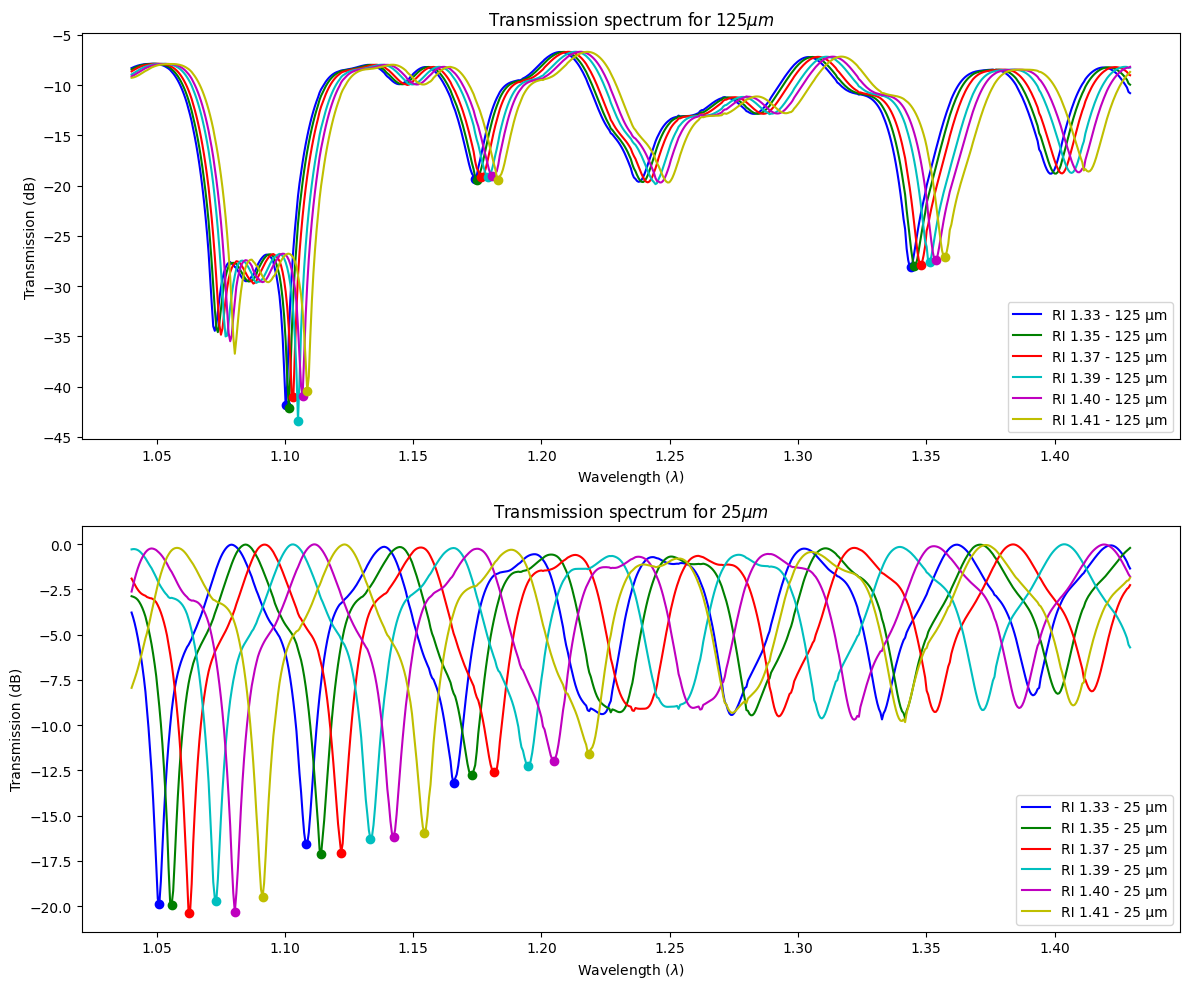

In [7]:
relevant_peak_data = []
fig, ax = plt.subplots(figsize=(12, 10), nrows=2, ncols=1)

for i, (col_ri, col_unetching, col_etching) in enumerate(zip(RI, unetching, etching)):

    # 125 µm
    analyzer_125 = FindPeaks(Data['Wavelength'], Data[col_unetching], col_ri, "125 µm")
    analyzer_125.detectPeaks().analyzePeaks()
    analyzer_125.plot(ax[0], color=colors[i], label=f'RI {col_ri} - 125 µm')
    relevant_peak_data.extend(analyzer_125.Peak_Data)

    # Visualisation relevant peaks 125 µm
    ax[0].set_xlabel('Wavelength ($\lambda$)')
    ax[0].set_ylabel("Transmission (dB)")
    ax[0].set_title('Transmission spectrum for 125$\mu m$')
    ax[0].legend()



    # 25 µm
    analyzer_25 = FindPeaks(Data['Wavelength'], Data[col_etching], col_ri, "25 µm")
    analyzer_25.detectPeaks().analyzePeaks()
    analyzer_25.plot(ax[1], color=colors[i], label=f'RI {col_ri} - 25 µm')
    relevant_peak_data.extend(analyzer_25.Peak_Data)

    # Visualisation relevant peaks 25 µm
    ax[1].set_xlabel('Wavelength ($\lambda$)')
    ax[1].set_ylabel("Transmission (dB)")
    ax[1].set_title('Transmission spectrum for 25$\mu m$')
    ax[1].legend()

    fig.tight_layout()


# DataFrame with the relevant peaks
Data2 = pd.DataFrame(relevant_peak_data)

#
print(Data2['MMF Diameter'].value_counts())  # Verify number of 125µm and 25µm samples


In [8]:
Data2

,MMF Diameter,surrounding environment,Wavelength,Transmission,Spectral width,Prominences
0,125 µm,1.33,1.344144,-28.093660,0.013600,19.851473
1,125 µm,1.33,1.100300,-41.878625,0.034052,34.005365
2,125 µm,1.33,1.174174,-19.356142,0.011665,11.371331
3,25 µm,1.33,1.051051,-19.888000,0.006535,16.109229
4,25 µm,1.33,1.108108,-16.578923,0.010646,16.550441
5,25 µm,1.33,1.165766,-13.214518,0.016555,13.070812
6,125 µm,1.35,1.345345,-28.024473,0.013684,19.799292
7,125 µm,1.35,1.101502,-42.171207,0.034061,34.297865
8,125 µm,1.35,1.174775,-19.430574,0.011609,11.450501
9,25 µm,1.35,1.055856,-19.922722,0.007039,17.046136


##	Statistical analysis of custom data and feature extraction.

Firstly, we conduct a statistical analysis of the previously extracted characteristics, using the describe() function to obtain key statistics such as the mean, median and variance. This provides a general overview of the data distribution. It was also realised that the distribution of characteristics selected for histograms and boxplots can be used to identify asymmetries or atypical values that could influence later results.

To identify differences between classes, a statistical test such as the Shapiro–Wilk test was used to verify whether the variable had a normal distribution. Based on these results, Wilcoxon was employed for paired non-parametric data and ANOVA for unpaired parametric data. These tests were performed to identify significant

In [9]:
print('Summary of relevant peak statistics:')
Data2.describe()

Summary of relevant peak statistics:


,Wavelength,Transmission,Spectral width,Prominences
count,36.000000,36.000000,36.000000,36.000000
mean,1.170020,-22.915532,0.016459,18.600769
std,0.092441,9.700283,0.008910,7.562910
min,1.051051,-43.404669,0.006535,11.113824
25%,1.104655,-27.674873,0.011247,12.320598
50%,1.160060,-19.471307,0.012892,17.039517
75%,1.186036,-16.503983,0.018737,19.723592
max,1.357357,-11.613537,0.035209,35.524832


The describe() function was used to summarise the statistical analysis of the extracted characteristics. In the case of the wavelength, the mean is 1.7$\mu m$ with a standard deviation of 0.09, suggesting a dispersed distribution. The transmission had a mean of -22.91 dB within a range of -43.4 to -11.6 dB, with a standard deviation of 9.7dB. This may be due to the difference in depth between the peaks detected in both configurations. Also, the spectral width has a mean and standard deviation; this is to be expected given that we are searching for peaks with a small spectral width.

### Histograms of each feature

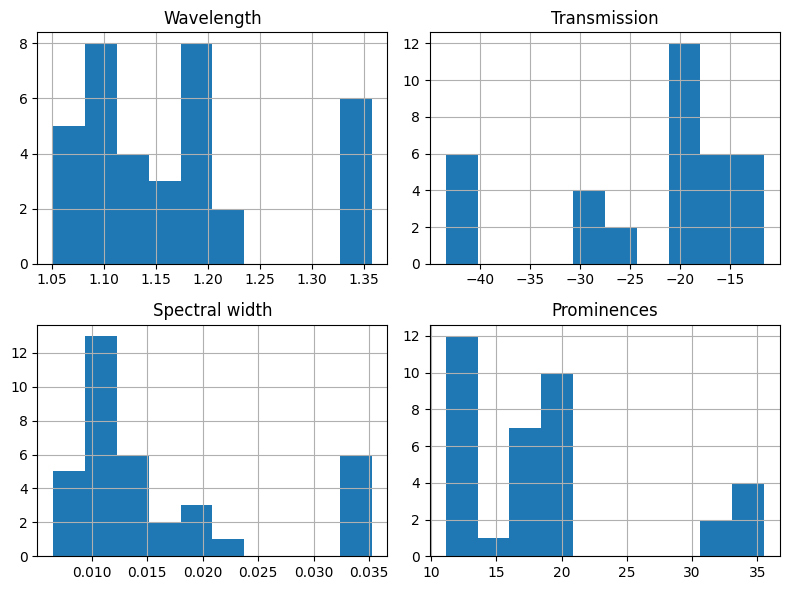

In [10]:
# Histograms of each feature
Data2.hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

The histograms of the observed characteristics demonstrate a symmetrical distribution with respect to wavelength and spectral width. In comparison with the other characteristics, transmission remains constant at shallower values. Taking the prominence into account, many prominences have a moderate prominence.

### Distribution of spectral features by MMF diameter.

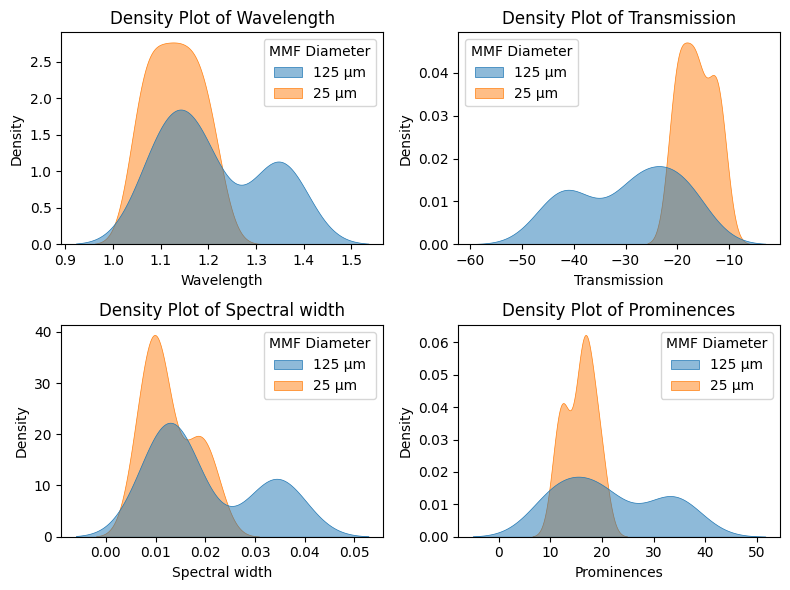

In [11]:
features = ['Wavelength','Transmission','Spectral width','Prominences']

plt.figure(figsize=(8, 6))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=Data2, x=feature, hue='MMF Diameter', fill=True, alpha=0.5, linewidth=0.5)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

c:\Users\ITM\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\ITM\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\ITM\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\ITM\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\ITM\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list h

<Figure size 1000x800 with 0 Axes>

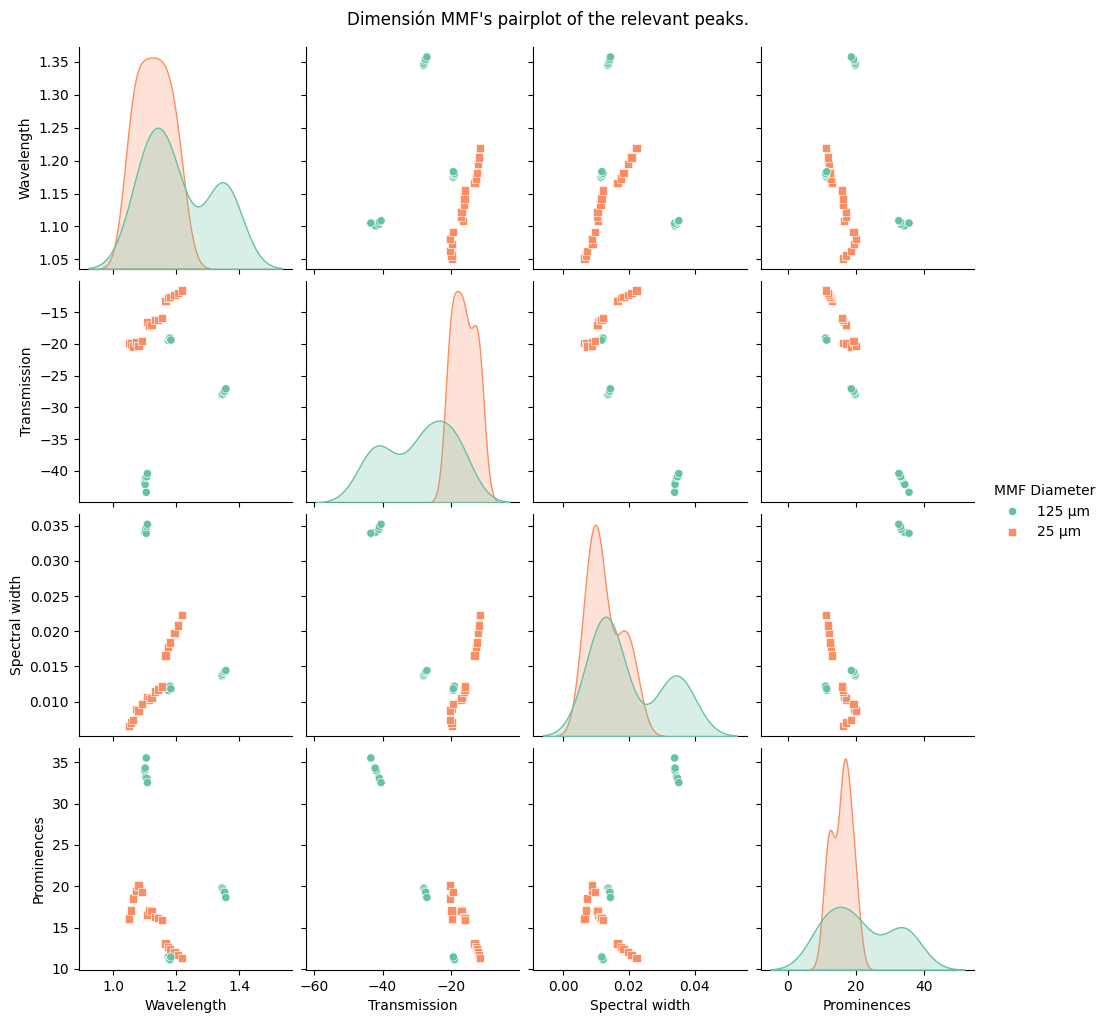

In [12]:
plt.figure(figsize=(10, 8))

sns.pairplot(Data2, hue='MMF Diameter', palette='Set2', markers=["o", "s", "D"], diag_kind='kde')
plt.suptitle("Dimensión MMF's pairplot of the relevant peaks.", y=1.02)
plt.show()

### Distribution of spectral features by RI.

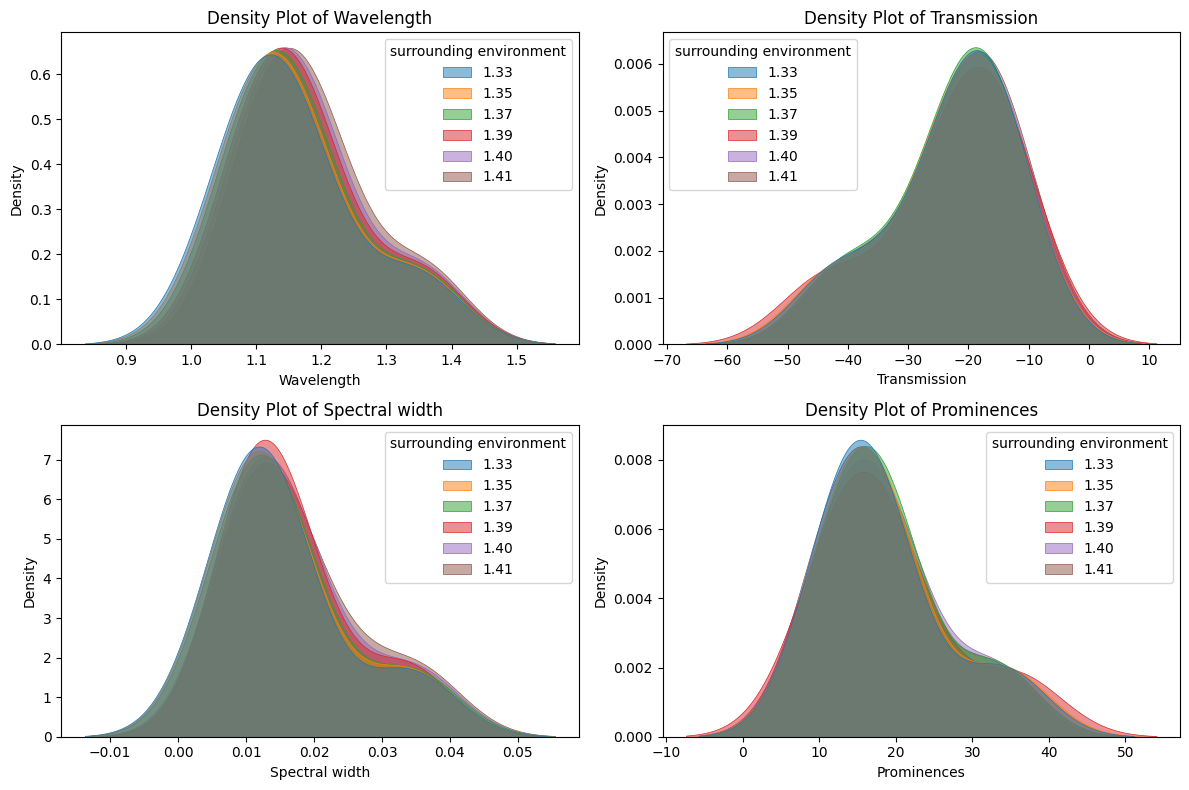

In [13]:

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=Data2, x=feature, hue='surrounding environment', fill=True, alpha=0.5, linewidth=0.5)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

c:\Users\ITM\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\ITM\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\ITM\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\ITM\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwar

<Figure size 1000x800 with 0 Axes>

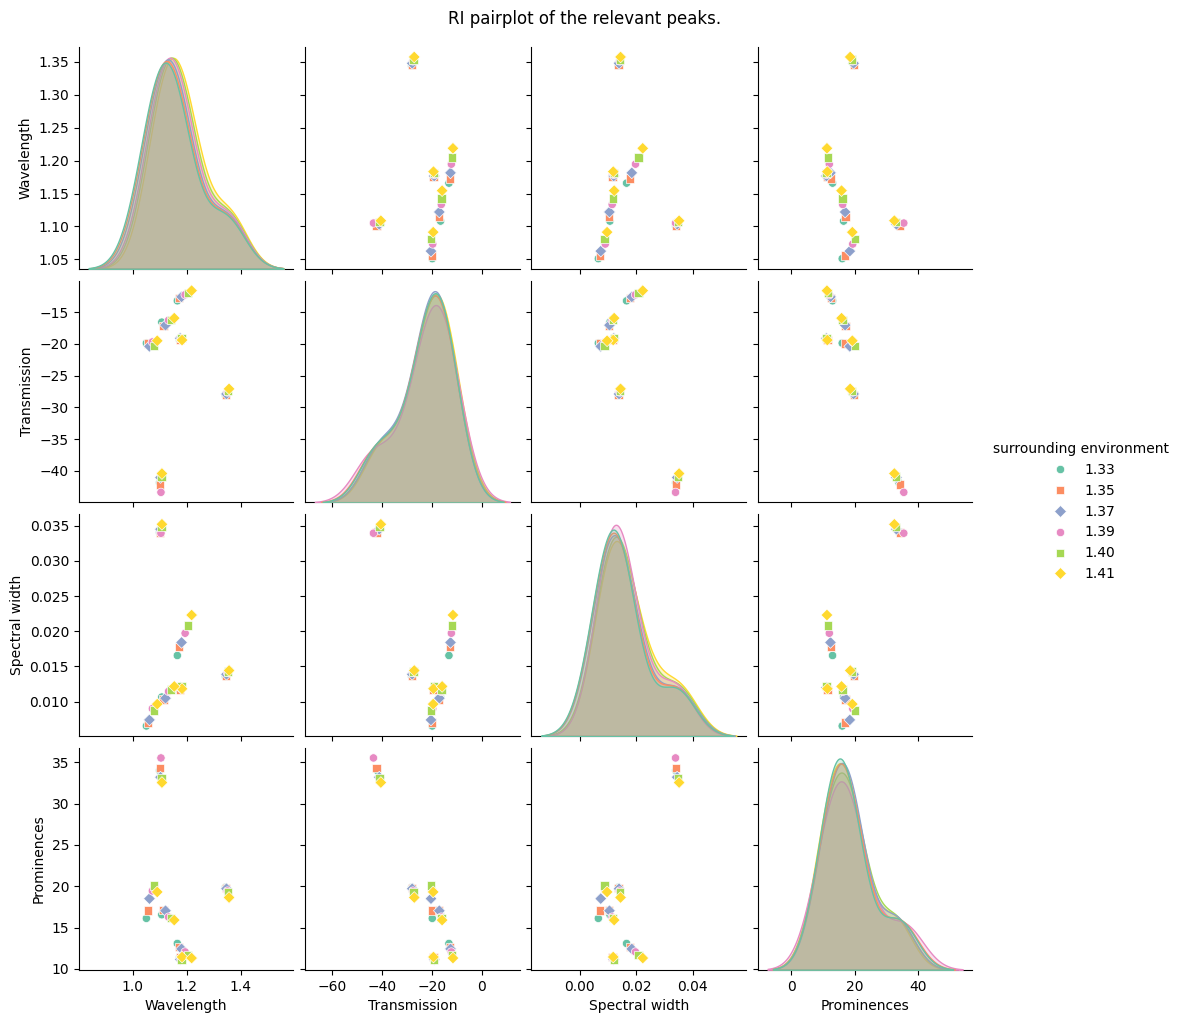

In [14]:

plt.figure(figsize=(10, 8))

sns.pairplot(Data2, hue='surrounding environment', palette='Set2', markers=["o", "s", "D"], diag_kind='kde')
plt.suptitle("RI pairplot of the relevant peaks.", y=1.02)
plt.show()

The characteristics were grouped into two possible classes.  MMF diameter (25$\mu m$ and 125$\mu m$) and classes corresponding to the refractive index (RI) of the surrounding environment. This makes it easier to view the difference in the MMF diameter and the aggregations of the data, especially with regard to characteristics such as wavelength and spectral width. Additionally, KDE analysis reinforces histogram analysis by determining the optimal separation between classes based on fibre geometry rather than RI classes.

In [15]:
features = ['Wavelength', 'Transmission', 'Spectral width', 'Prominences']
type(Data2[Data2[features[-1]] == 0][features[2]])

pandas.core.series.Series

### Shapiro-Wilk Test

In [16]:
MMF_125_Wavelength = Data2[Data2['MMF Diameter'] == '125 µm']['Wavelength']
MMF_25_Wavelength = Data2[Data2['MMF Diameter'] == '25 µm']['Wavelength']


# Perform the Shapiro-Wilk test for normality
shapiro_125um = shapiro(MMF_125_Wavelength)
shapiro_25um = shapiro(MMF_25_Wavelength)


print("Shapiro-Wilk Test for 125$\mu m$: ", shapiro_125um)
print("Shapiro-Wilk Test for 25$\mu m$ ", shapiro_25um)


Shapiro-Wilk Test for 125$\mu m$:  ShapiroResult(statistic=np.float64(0.7855537789686738), pvalue=np.float64(0.0009562803789113808))
Shapiro-Wilk Test for 25$\mu m$  ShapiroResult(statistic=np.float64(0.9553080592354283), pvalue=np.float64(0.5141849146234612))


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ITM\AppData\Local\Temp\ipykernel_150820\1103101600.py:10: SyntaxWarning: invalid escape sequence '\m'
  print("Shapiro-Wilk Test for 125$\mu m$: ", shapiro_125um)
C:\Users\ITM\AppData\Local\Temp\ipykernel_150820\1103101600.py:11: SyntaxWarning: invalid escape sequence '\m'
  print("Shapiro-Wilk Test for 25$\mu m$ ", shapiro_25um)


In [17]:
RI_1_33_Wavelength = Data2[Data2['surrounding environment'] == '1.33']['Wavelength']
RI_1_35_Wavelength  = Data2[Data2['surrounding environment'] == '1.35']['Wavelength']
RI_1_37_Wavelength = Data2[Data2['surrounding environment'] == '1.37']['Wavelength']
RI_1_39_Wavelength  = Data2[Data2['surrounding environment'] == '1.39']['Wavelength']
RI_1_40_Wavelength  = Data2[Data2['surrounding environment'] == '1.40']['Wavelength']
RI_1_41_Wavelength  = Data2[Data2['surrounding environment'] == '1.41']['Wavelength']

# Perform the Shapiro-Wilk test for normality
shapiro_1_33 = shapiro(RI_1_33_Wavelength )
shapiro_1_35 = shapiro(RI_1_35_Wavelength)
shapiro_1_37 = shapiro(RI_1_37_Wavelength )
shapiro_1_39 = shapiro(RI_1_39_Wavelength)
shapiro_1_40 = shapiro(RI_1_40_Wavelength )
shapiro_1_41 = shapiro(RI_1_41_Wavelength)


print("Shapiro-Wilk Test for 1.33: ", shapiro_1_33)
print("Shapiro-Wilk Test for 1.35: ", shapiro_1_35)
print("Shapiro-Wilk Test for 1.37: ", shapiro_1_37)
print("Shapiro-Wilk Test for 1.39: ", shapiro_1_39)
print("Shapiro-Wilk Test for 1.40: ", shapiro_1_40)
print("Shapiro-Wilk Test for 1.41: ", shapiro_1_41)

Shapiro-Wilk Test for 1.33:  ShapiroResult(statistic=np.float64(0.8791665924122674), pvalue=np.float64(0.2652517146218674))
Shapiro-Wilk Test for 1.35:  ShapiroResult(statistic=np.float64(0.8785071981995006), pvalue=np.float64(0.2622716603555705))
Shapiro-Wilk Test for 1.37:  ShapiroResult(statistic=np.float64(0.8839094385052412), pvalue=np.float64(0.28749485114904294))
Shapiro-Wilk Test for 1.39:  ShapiroResult(statistic=np.float64(0.8926852734745728), pvalue=np.float64(0.33249729842377607))
Shapiro-Wilk Test for 1.40:  ShapiroResult(statistic=np.float64(0.8993543629677231), pvalue=np.float64(0.3701277193027409))
Shapiro-Wilk Test for 1.41:  ShapiroResult(statistic=np.float64(0.9014363069823497), pvalue=np.float64(0.38248947348555634))


Shapiro-Wilk normality testing was applied to the wavelength characteristic, which tended to cluster better depending on fibre diameter. This showed that the 25$\mu m$ data had a normality of approximately 51%, compared to 125$\mu m$. This could be because, although the 125$\mu m$ data is visually more dispersed, the 25$\mu m$ data has a more concentrated and symmetrical distribution.

### Statistical tests of MMF diameters.

In [18]:
# Hipotesis null by p-value
h_stat, p_value = f_oneway(MMF_125_Wavelength, MMF_25_Wavelength)


print(f"H-statistic: {h_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference in the variance of wavelengths among MMF diameters.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the variance of wavelengths among MMF diameters.")

H-statistic: 8.497267141118321
P-value: 0.0062524820671576295
The null hypothesis is rejected. There is a significant difference in the variance of wavelengths among MMF diameters.


In [19]:
# Wilcoxon
res = wilcoxon(MMF_125_Wavelength, MMF_25_Wavelength, alternative='greater')
print(res)


WilcoxonResult(statistic=np.float64(108.0), pvalue=np.float64(0.17327499389648438))


 Since the data are paired (the same refractive index (RI) conditions apply to both fibres) and one of the configurations is not normally distributed, a non-parametric Wilcoxon test was applied. This analysis focused on comparing the wavelengths for the two geometries. As the p-value (0.17) is greater than 5%, we can conclude that the wavelength distributions for the different geometries are different.

##	Data separability.

To evaluate the separability of the analysed fibre configurations, the relevant performance metrics were considered in relation to the characteristics, specifically the wavelength associated with the significant resonance peaks. The root-mean-square error (RMSE) was calculated for the differences in wavelength between the relevant peaks detected in the two fibres. Additionally, the correlation coefficient was used to identify the linear relationship between the peak positions of the two fibres. These metrics allow us to assess the usefulness of the set of characteristics extracted for classification and detection.

### Root Mean Square Error (RMSE)

In [20]:
rmse = np.sqrt(mean_squared_error(MMF_125_Wavelength, MMF_25_Wavelength))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.16504894755710836


Taking into account the obtained RMSE value (0.165) and considering the analysed spectral range (1.04 to 1.43)$\mu m$, it is evident that there is a significant separation between the spectral peaks of the two geometries, which could indicate distinctive spectral behaviour.

### Correlation coefficient

In [21]:
corr, p_val = pearsonr(MMF_125_Wavelength, MMF_25_Wavelength)
print(f"Pearson correlation: {corr}, p-value: {p_val}")


Pearson correlation: -0.6838440697434085, p-value: 0.0017514531282779866


The negative correlation coefficient indicates a moderately high inverse correlation between the wavelengths of the peaks in the two configurations. This means that when the peaks in one configuration are at longer wavelengths, they tend to be at shorter wavelengths in the other. Also, the p-value of less than 5% indicates that this correlation is statistically significant.

## Conclusions

The results demonstrate a significant difference in performance between the two fibre configurations when the refractive index of the surrounding medium varies. The prominent, well-localised peaks suggest an interferometric structure that has high biosensing capabilities.

## Referencias

https://medium.com/@aditib259/data-cleaning-in-python-how-to-handle-missing-values-outliers-more-8f8b68b12436 (Verify the type of data and any missing values)

https://pandas.pydata.org/docs/user_guide/merging.html (connect the DataFrame )

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html (Generate descriptive statistics)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_widths.html (Calculate the spectral width)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_prominences.html (Calculate the prominence)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html (Calculate the Wilcoxon test)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (Calculate the RMSE)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html (Calculate the correlation coefficient)